## Analysis of a car sell record Dataset

We have been provided with a car sell record dataset. In this dataset, we have thounds of car sell records.

The structure of this dataset is represented in the header shown below.

name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner

| name | year | selling_price | km_driven| fuel | seller_type | transmission | Owner |

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |   
    
#### Description of Fields

* __name__ - detail car type of the sold car
* __year__ - Year of the car when it was bought
* __selling_price__ - Price at which the car is being sold
* __km_driven__ - Number of Kilometres the car is driven
* __fuel__ - Fuel type of car (petrol / diesel / CNG / LPG / electric)
* __seller_type__ - Tells if a Seller is Individual or a Dealer
* __transmission__ - Gear transmission of the car (Automatic/Manual)
* __owner__ - Number of previous owners of the car.

There are four questions to explore with the data as shown below.


In [ ]:
your_name = "Tittu Thomas"
your_student_id = "47891653"

In [63]:
# libraries you might need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# if you are using google colab with google drive, you could read files from google drive with the following codes
# from google.colab import drive
# drive.mount('/content/drive')

 ## Q1. Remove missing data

Please remove the records that match ANY of the below two conditions in the csv file:

 * year is missing
 * fuel is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [11]:
cars_df = pd.read_csv('car_sell.csv')

cars_df.info()
cars_df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     4340 non-null   int64  
 1   name           4340 non-null   object 
 2   year           4030 non-null   float64
 3   selling_price  4340 non-null   int64  
 4   km_driven      4340 non-null   int64  
 5   fuel           4340 non-null   object 
 6   seller_type    4340 non-null   object 
 7   transmission   4340 non-null   object 
 8   owner          4340 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 305.3+ KB


Unnamed: 0         0
name               0
year             310
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
dtype: int64

In [13]:
cars_df.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner


In [17]:
print('the length before removing null and missing data is ', len(cars_df))

the length before removing null and missing data is  4340


In [33]:

# Create a copy of the original DataFrame to work on
clean_carsdf = cars_df.copy()

# Remove records where 'year' is missing or 'fuel' is 'none'
clean_carsdf = clean_carsdf.dropna(subset=['year'])  # Drop rows where 'year' is NaN
clean_carsdf = clean_carsdf[clean_carsdf['fuel'] != 'none']  # Drop rows where 'fuel' is 'none'

# Drop rows with any other missing values
clean_carsdf = clean_carsdf.dropna()

# Print the results
print('The length before removing rows with missing "year" or "fuel" is none:', len(cars_df))
print('The length after removing rows with missing "year" or "fuel" is none:', len(clean_carsdf))

The length before removing rows with missing "year" or "fuel" is none: 4340
The length after removing rows with missing "year" or "fuel" is none: 3886


## Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner
* Q2.2 descriptive statistics, including the total number, mean, std, min and max regarding all km_driven
* Q2.3 descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type
* Q2.4 descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type


In [43]:
#Q2.1

# Calculate and print the number of unique values for name, seller_type, transmission and owner from cars_df
for column in columns:
    unique_count = clean_carsdf[column].nunique()
    print(f"Unique {column.replace('_', ' ')}: {unique_count}")



Unique name: 1402
Unique seller type: 3
Unique transmission: 2
Unique owner: 5


In [49]:
#Q2.2

# Get and print descriptive statistics including the total number, mean, std, min and max regarding all km_driven for 'km_driven'
km_stats = clean_carsdf['km_driven'].describe()
print(km_stats[['count', 'mean', 'std', 'min', 'max']])


count      3886.000000
mean      66313.279207
std       46679.603916
min           1.000000
max      806599.000000
Name: km_driven, dtype: float64


In [53]:
#Q2.3

# Group by 'seller_type' and calculate descriptive statistics  including mean, std, max, and min of the number of selling_price grouped by different seller_type for 'selling_price'
stats = clean_carsdf.groupby('seller_type')['selling_price'].agg(['mean', 'std', 'max', 'min'])

# Print the results
print(stats)


                           mean            std      max     min
seller_type                                                    
Dealer            702093.314961  813597.811832  8900000   22000
Individual        421169.410265  420273.684129  4800000   20000
Trustmark Dealer  935797.872340  655724.299195  2600000  315000


In [59]:
#Q2.4

# Group by 'owner_type' and calculate descriptive statistics  including mean, std, max, min of the number of years that sold by each owner type for 'years'
stats = clean_carsdf.groupby('owner')['year'].agg(['mean', 'std', 'max', 'min'])

# Print the results
print(stats)


                             mean       std     max     min
owner                                                      
First Owner           2014.453791  3.555597  2020.0  1996.0
Fourth & Above Owner  2007.238806  5.248635  2020.0  1992.0
Second Owner          2010.977000  3.840993  2019.0  1995.0
Test Drive Car        2019.642857  0.633324  2020.0  2018.0
Third Owner           2009.413919  3.920266  2019.0  1997.0


## Q3. Plotting and Analysis

Please try to explore the correlation between fuel/year/seller_type/transmission/owner and selling_price; for instance, do First Owner cars tend to sell higher prices than second owner cars? Hint: you may use the boxplot function to plot figures for comparison
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you are required to provide an overall summary of your findings from the plots you generated.

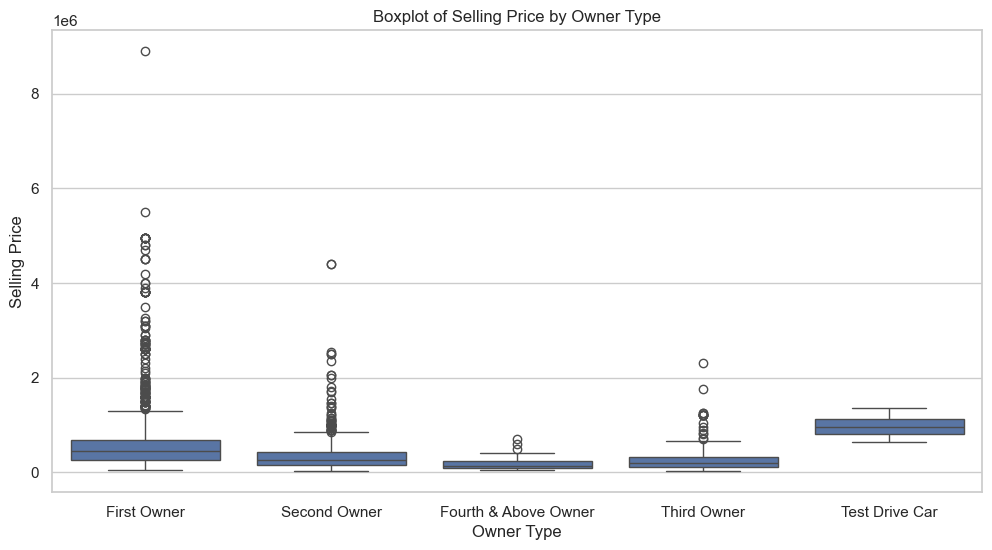

Analysis: The boxplot shows the distribution of selling prices across different owner types.
Observation: First Owner cars tend to have higher median selling prices compared to Second and Third Owner cars.
Explanation: This could be because cars with fewer previous owners are perceived as better maintained and thus more valuable.


In [95]:

#This boxplot shows the distribution of selling_price across different owner categories.
#We can observe if there are significant differences in selling prices between cars with different owner types.

# Set the visual style
sns.set(style="whitegrid")

# Create a boxplot for 'owner' vs 'selling_price'
plt.figure(figsize=(12, 6))
sns.boxplot(x='owner', y='selling_price', data=clean_carsdf)
plt.title('Boxplot of Selling Price by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Selling Price')
plt.show()

# Analysis
print("Analysis: The boxplot shows the distribution of selling prices across different owner types.")
print("Observation: First Owner cars tend to have higher median selling prices compared to Second and Third Owner cars.")
print("Explanation: This could be because cars with fewer previous owners are perceived as better maintained and thus more valuable.")




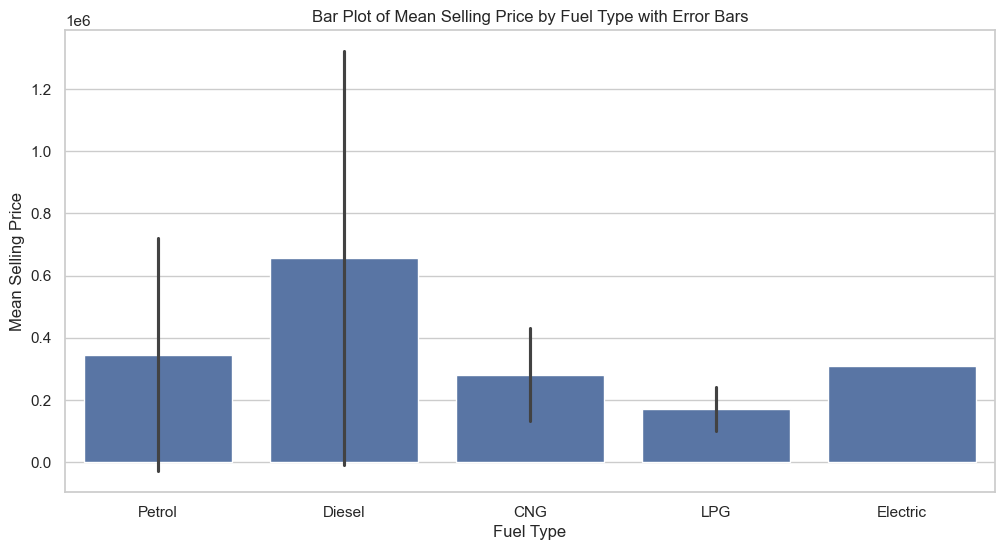

Analysis: The bar plot shows the average selling price for each fuel type with standard deviation error bars.
Observation: Diesel cars not only have a higher average selling price but also show more variability in prices compared to Petrol cars.
Explanation: This plot highlights the central tendency and variability of selling prices, indicating how much prices can fluctuate within each fuel type.


In [78]:
# Bar plot for 'fuel' vs mean 'selling_price' with error bars
plt.figure(figsize=(12, 6))
sns.barplot(x='fuel', y='selling_price', data=clean_carsdf, errorbar='sd')
plt.title('Bar Plot of Mean Selling Price by Fuel Type with Error Bars')
plt.xlabel('Fuel Type')
plt.ylabel('Mean Selling Price')
plt.show()

# Analysis
print("Analysis: The bar plot shows the average selling price for each fuel type with standard deviation error bars.")
print("Observation: Diesel cars not only have a higher average selling price but also show more variability in prices compared to Petrol cars.")
print("Explanation: This plot highlights the central tendency and variability of selling prices, indicating how much prices can fluctuate within each fuel type.")


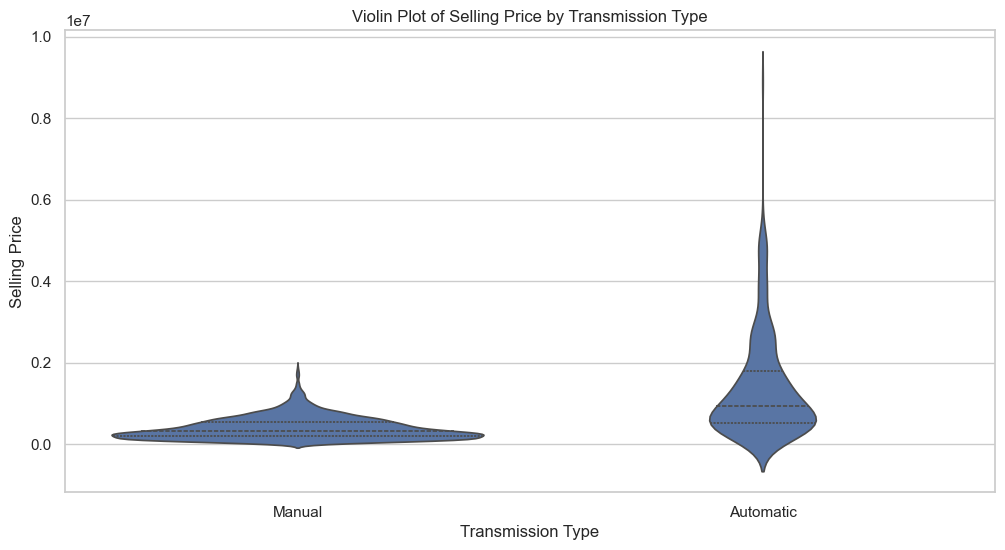

Analysis: The violin plot shows the distribution and density of selling prices for each transmission type.
Observation: The distribution for Automatic cars is more spread out with a higher concentration at higher prices compared to Manual cars.
Explanation: The violin plot provides a clearer picture of the spread and density of selling prices, reinforcing the observation that Automatic cars tend to have higher selling prices.


In [84]:
# Violin plot for 'transmission' vs 'selling_price'
plt.figure(figsize=(12, 6))
sns.violinplot(x='transmission', y='selling_price', data=clean_carsdf, inner="quartile")
plt.title('Violin Plot of Selling Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.show()

# Analysis
print("Analysis: The violin plot shows the distribution and density of selling prices for each transmission type.")
print("Observation: The distribution for Automatic cars is more spread out with a higher concentration at higher prices compared to Manual cars.")
print("Explanation: The violin plot provides a clearer picture of the spread and density of selling prices, reinforcing the observation that Automatic cars tend to have higher selling prices.")



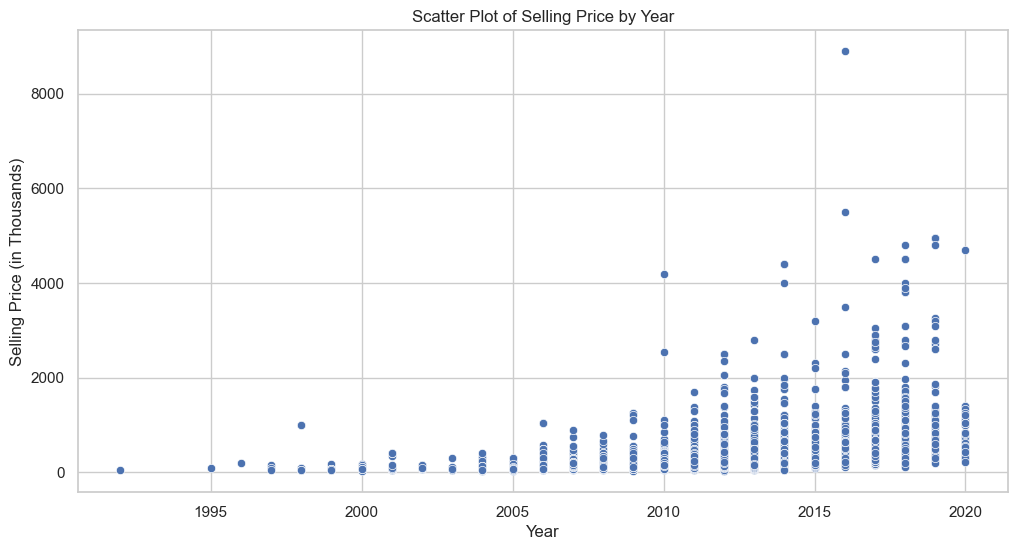

Analysis: The scatter plot shows the relationship between the car's year of manufacture and its selling price (in thousands).
Observation: There is a general trend of newer cars having higher selling prices, now displayed in thousands.
Explanation: This is expected as newer cars are usually in better condition, have more modern features, and are less likely to require immediate repairs.


In [90]:
# Convert selling price to thousands
clean_carsdf['selling_price_thousands'] = clean_carsdf['selling_price'] / 1000

# Create a scatter plot for 'year' vs 'selling_price' (in thousands)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='year', y='selling_price_thousands', data=clean_carsdf)
plt.title('Scatter Plot of Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Selling Price (in Thousands)')
plt.show()

# Analysis
print("Analysis: The scatter plot shows the relationship between the car's year of manufacture and its selling price (in thousands).")
print("Observation: There is a general trend of newer cars having higher selling prices, now displayed in thousands.")
print("Explanation: This is expected as newer cars are usually in better condition, have more modern features, and are less likely to require immediate repairs.")

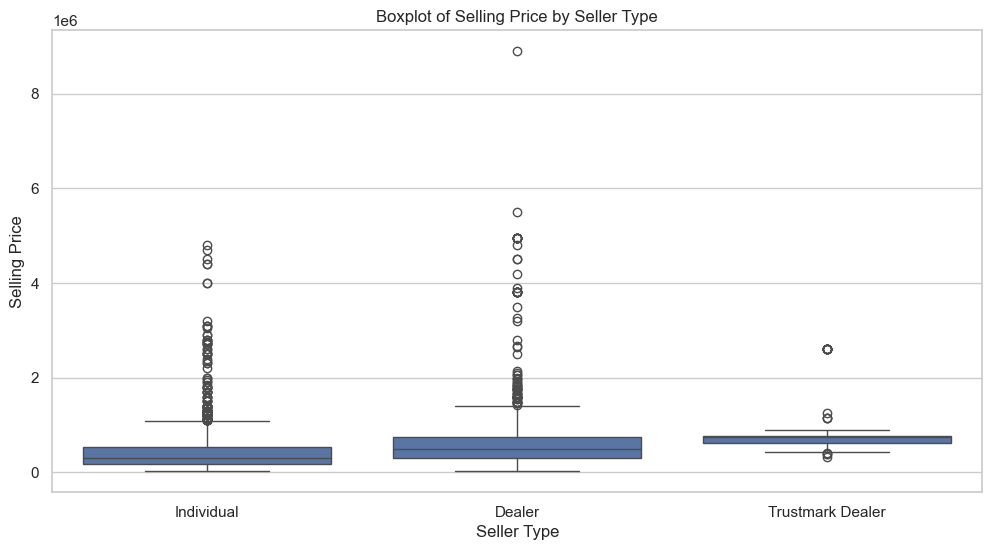

Analysis: The boxplot shows the distribution of selling prices across different seller types.
Observation: Cars sold by dealers tend to have a higher median selling price compared to those sold by individuals.
Explanation: Dealers may offer certified pre-owned vehicles or additional services, which can justify a higher price.


In [92]:
# Create a boxplot for 'seller_type' vs 'selling_price'
plt.figure(figsize=(12, 6))
sns.boxplot(x='seller_type', y='selling_price', data=clean_carsdf)
plt.title('Boxplot of Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.show()

# Analysis
print("Analysis: The boxplot shows the distribution of selling prices across different seller types.")
print("Observation: Cars sold by dealers tend to have a higher median selling price compared to those sold by individuals.")
print("Explanation: Dealers may offer certified pre-owned vehicles or additional services, which can justify a higher price.")


In [97]:
# Overall Summary
print("Overall Summary:")
print("1. First Owner cars generally command higher prices, likely due to better maintenance and fewer previous owners.")
print("2. Diesel cars are valued higher than Petrol cars, possibly due to their efficiency and durability.")
print("3. Automatic transmissions tend to increase the selling price, reflecting consumer preference for convenience.")
print("4. Newer cars are priced higher, which is expected due to their condition and features.")
print("5. Cars sold by dealers are often priced higher, possibly due to added services and warranties.")


Overall Summary:
1. First Owner cars generally command higher prices, likely due to better maintenance and fewer previous owners.
2. Diesel cars are valued higher than Petrol cars, possibly due to their efficiency and durability.
3. Automatic transmissions tend to increase the selling price, reflecting consumer preference for convenience.
4. Newer cars are priced higher, which is expected due to their condition and features.
5. Cars sold by dealers are often priced higher, possibly due to added services and warranties.


## Q4. Detect and remove outliers

We define car sale records WITHOUT following ANY of the below three rules as outliers:

1. owner to be first, second and third owner only
2. Fuel to be Diesel or Petrol only
3. Seller_type to be dealer or individual only

Please remove the corresponding records in the csv file that is not qualified with the rules. After that, __print the length of the data__.

In [129]:
# Define the criteria for valid records for owner
valid_owners = ['First Owner', 'Second Owner', 'Third Owner']

# Filter the data to include only the valid records
cars_df1 = clean_carsdf[
    (clean_carsdf['owner'].isin(valid_owners))
]

# Calculate the number of valid records and outliers
num_valid_records = len(cars_df1)
num_outliers = len(clean_carsdf) - num_valid_records

# Print the length of the filtered data
print("Length of the data after removing outliers:", num_valid_records)
print("Number of outliers removed:", num_outliers)



Length of the data after removing outliers: 3805
Number of outliers removed: 81


In [131]:
# Define the criteria for valid records for Fuel
valid_fuels = ['Diesel', 'Petrol']

# Filter the data to include only the valid records
cars_df2 = cars_df1[
    (cars_df1['fuel'].isin(valid_fuels))
]

# Calculate the number of valid records and outliers
num_valid_records1 = len(cars_df2)
num_outliers = len(cars_df1) - num_valid_records1

# Print the length of the filtered data
print("Length of the data after removing outliers:", num_valid_records1)
print("Number of outliers removed:", num_outliers)

Length of the data after removing outliers: 3751
Number of outliers removed: 54


In [133]:
# Define the criteria for valid records for Seller_type
valid_seller_types = ['Dealer', 'Individual']

# Filter the data to include only the valid records
cars_df3 = cars_df2[
    (cars_df2['seller_type'].isin(valid_seller_types))
]

# Calculate the number of valid records and outliers
num_valid_records2 = len(cars_df3)
num_outliers = len(cars_df2) - num_valid_records2

# Print the length of the filtered data
print("Length of the data after removing outliers:", num_valid_records2)
print("Number of outliers removed:", num_outliers)



Length of the data after removing outliers: 3657
Number of outliers removed: 94


In [135]:
# To save the filtered data back to a CSV file, you can do so with:
cars_df3.to_csv('cars_df3.csv', index=False)